In [1]:
# In this notebook we understand the type of "gradient Decent"-- Batch, mini Batch, StochasticGD

In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
print(X)
print("*"*10)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
**********
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [10]:
# now scale the data using StandardScaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled.shape

(400, 2)

In [14]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
# X_train.shape

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 2))
model.add(Dense(10,activation ='relu'))
model.add(Dense(1,activation = 'sigmoid'))  # loss function -- binary cross entropy or logloss

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs = 300,batch_size = 1,validation_split = 0.2)
print(time.time()-start)

Epoch 1/300
320/320 [==============================] - 2s 3ms/step - loss: 0.2786 - accuracy: 0.9062 - val_loss: 0.1640 - val_accuracy: 0.9250
Epoch 2/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2788 - accuracy: 0.9094 - val_loss: 0.1778 - val_accuracy: 0.9250
Epoch 3/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.9062 - val_loss: 0.1606 - val_accuracy: 0.9125
Epoch 4/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 0.9062 - val_loss: 0.1665 - val_accuracy: 0.9000
Epoch 5/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2793 - accuracy: 0.9062 - val_loss: 0.1713 - val_accuracy: 0.9125
Epoch 6/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9062 - val_loss: 0.1662 - val_accuracy: 0.9250
Epoch 7/300
320/320 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.9062 - val_loss: 0.1630 - val_accuracy: 0.9250

In [21]:
# batch_size = 1                 -----> it mean we use "stochastics GD"
# batch_size = now of row in data ---->  "BatchGD"

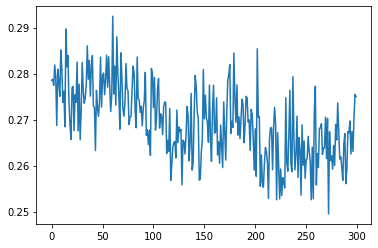

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [23]:
""" Stochastics"""
# less faster
# unstable loss function reduce
# higher validation accuracy 

In [24]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
# batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=300,batch_size=400,validation_split=0.2)   # batchsize = no.of row
print(time.time() - start)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.6403 - accuracy: 0.7125 - val_loss: 0.7584 - val_accuracy: 0.3625
Epoch 2/300
1/1 [==============================] - 0s 47ms/step - loss: 0.6314 - accuracy: 0.7312 - val_loss: 0.7559 - val_accuracy: 0.3625
Epoch 3/300
1/1 [==============================] - 0s 43ms/step - loss: 0.6251 - accuracy: 0.7406 - val_loss: 0.7540 - val_accuracy: 0.3875
Epoch 4/300
1/1 [==============================] - 0s 48ms/step - loss: 0.6198 - accuracy: 0.7375 - val_loss: 0.7522 - val_accuracy: 0.4000
Epoch 5/300
1/1 [==============================] - 0s 51ms/step - loss: 0.6151 - accuracy: 0.7406 - val_loss: 0.7506 - val_accuracy: 0.4000
Epoch 6/300
1/1 [==============================] - 0s 47ms/step - loss: 0.6108 - accuracy: 0.7437 - val_loss: 0.7491 - val_accuracy: 0.4000
Epoch 7/300
1/1 [==============================] - 0s 45ms/step - loss: 0.6068 - accuracy: 0.7469 - val_loss: 0.7476 - val_accuracy: 0.4000
Epoch 8/300
1/1 [=====

In [27]:
""" BatchGD"""
# faster
# less validataion accuracy compare to stochastic
# smooth graph

' BatchGD'

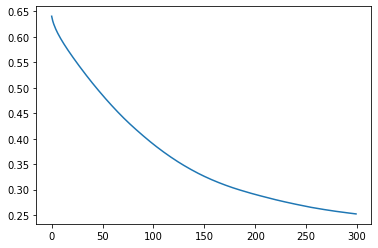

In [28]:
plt.plot(history.history['loss'])

In [29]:
# Mini Batch GD
# it is in/bw batch and stochastic
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)   # batch size is divided -- 400/250 = 250,250,100
print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 337ms/step - loss: 0.7023 - accuracy: 0.5969 - val_loss: 1.0131 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 52ms/step - loss: 0.6866 - accuracy: 0.6844 - val_loss: 1.0084 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 82ms/step - loss: 0.6769 - accuracy: 0.7688 - val_loss: 1.0032 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 0s 73ms/step - loss: 0.6683 - accuracy: 0.7781 - val_loss: 0.9984 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 0s 70ms/step - loss: 0.6604 - accuracy: 0.7844 - val_loss: 0.9921 - val_accuracy: 0.4125
Epoch 6/10
2/2 [==============================] - 0s 83ms/step - loss: 0.6531 - accuracy: 0.7812 - val_loss: 0.9872 - val_accuracy: 0.4125
Epoch 7/10
2/2 [==============================] - 0s 66ms/step - loss: 0.6464 - accuracy: 0.7781 - val_loss: 0.9810 - val_accuracy: 0.4125
Epoch 8/10
2/2 [==========

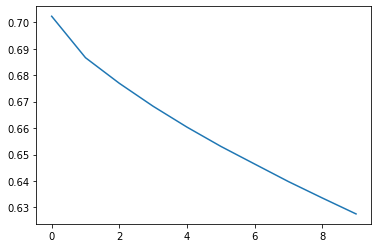

In [31]:
plt.plot(history.history['loss'])